
#  Linear Regression

## PETE 2061 Lab 9 Workbook 

## THIS IS DUE BY 11:59 PM on October 31, 2019

## Decline Curve Analysis
In the prediction of production data, the exponential decline curve analysis is very effective. The equation takes the following form:  
$$q=q_ie^{-D_i t}$$  
  
Where $q$ is the current production rate (BBL/day), $q_i$ is the initial production rate (BBL/day), $d$ is the decline rate, and $t$ is the time (days).

1. Take the natural logarithm of both sides of this equation and type the straight line equation you obtain into the cell below.
2. Also type in the parameter that represents the dependent (or response) variable, the independent (or exploratory) variable, the slope and intercept in this straight-line equation.

ln(q)=-D_i*t*ln(q_i)-D_i*t
Dependent: ln(q)
Independent:time (t)
Slope: -D_i*t
Intercept: ln(q_i)


3. Import rate and time data stored in wellA.csv and display the dataframe.

In [2]:
import numpy as np
import scipy.stats as ss 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
df=pd.read_csv('wellA.csv')
df

,time (days),rate (bopd)
0,0,2000.0
1,100,1743.2
2,200,1690.6
3,300,1482.4
4,400,1404.6
5,500,1164.0
6,600,1029.7
7,700,949.0
8,800,829.0
9,900,777.6


4. Make a scatter plot of the rate versus time

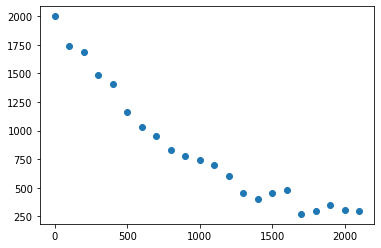

In [17]:
plt.scatter(df['time (days)'],df['rate (bopd)'])
plt.show()

5. Using the idea from problem 1, transform this data such that it plots roughly as data points following a straight line. <br> 
Hint: This will require plotting the natural logarithm instead of the actual value on the x or y axis.

In [24]:
df['ln(q)']=np.log(df['rate (bopd)'])
df

,time (days),rate (bopd),ln(q)
0,0,2000.0,7.600902
1,100,1743.2,7.463478
2,200,1690.6,7.432839
3,300,1482.4,7.301418
4,400,1404.6,7.247508
5,500,1164.0,7.059618
6,600,1029.7,6.937023
7,700,949.0,6.855409
8,800,829.0,6.720220
9,900,777.6,6.656212


6. Perform linear regression on the transformed linear data and provide the slope, intercept, coefficient of regression, P-value and standard error

In [25]:
[slope,inter,r,p,stderr]=ss.linregress(df['time (days)'],df['ln(q)'])
print(slope, inter, r, p, stderr)

-0.0009734647104151199 7.5590683952515105 -0.9827230832838905 3.98247281590269e-16 4.099569074766189e-05


7. Plot both your fitted straight-line model as well as the transformed data on the same graph.

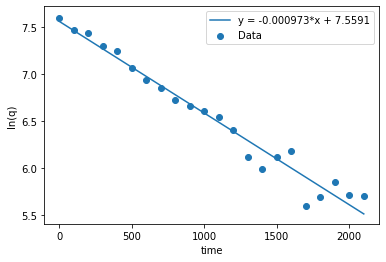

In [32]:
plt.scatter(df['time (days)'],df['ln(q)'])
model = np.array(df['time (days)'])*slope+inter
plt.plot(df['time (days)'],model)
if inter > 0:
    sign = '+'
else:
    sign = '-'
txt = 'y = '+str(round(slope,6))+'*x '+sign+' '+str(abs(round(inter,4)))
plt.legend([txt,'Data'])
plt.xlabel('time')
plt.ylabel('ln(q)')
plt.show()